# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read dataset into a dataframe:
df = pd.read_csv('data/human_body_temperature.csv')

# Inspect & Explore Dataset with Graphical EDA
## view dataset structure and summary statistics

In [220]:
# look at DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


dataframe has 3 columns and 130 rows, with no null fields. 

In [221]:
# inspect first few list of DataFrame 
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [222]:
# Dataframe summary statistics
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Temperature goes from 96.3$^{\circ}$F to 100.8$^{\circ}$F and looks to be recorded in tenth of a degree $^{\circ}$F. Will need review outliers in this distribution. Will be interesting to see if the distribution or sample size are simular between Females and Males.. Heart Rate was not expected as part of the exercise. It could be interesting to look for a possible relationship between Heart Rate and Temperature.

## Explore the dataset thru scatter and box plots
### swarm plots of temperature and gender vs temperature 
Primarily interesting in the overall shape of the data seen in a swarm plot of temperature.
In addition, curious of the distribution differences between Females and Males in the dataset.

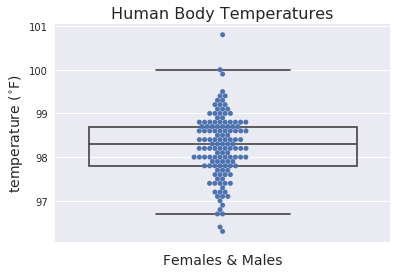

Overall median temp:  98.3


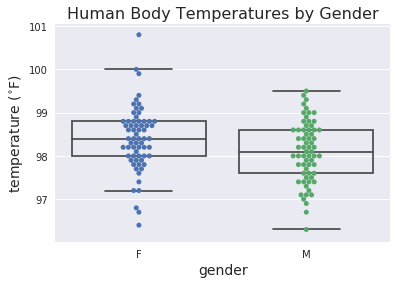

Female median temp:  98.4 $^{\circ}$F, Male median temp:  98.1 $^{\circ}$F


In [223]:
# swam plots of whole dataset and then show  Females and Males seperated in a swarm plot
_ = sns.swarmplot(y='temperature', data=df)
_ = sns.boxplot(y='temperature', data=df,
        showcaps=True, boxprops={'facecolor':'None'},
        showfliers=False, whiskerprops={'linewidth':0})
_ = plt.xlabel('Females & Males', fontsize=14)
_ = plt.ylabel('temperature ($^{\circ}$F)', fontsize=14)
_ = plt.title('Human Body Temperatures', fontsize=16)
plt.show()

#calculate and save sample's size, mean, median, and std. print one now, and save some for later
sample_size = len(df.temperature)
sample_mean = np.mean(df.temperature)
sample_median = np.median(df.temperature)
sample_std = np.std(df.temperature)

print("Overall median temp: ",round(sample_median,2))

# Make a Swarm plot of gender vs body temperature
_ = sns.swarmplot(x='gender',y='temperature', data=df)
_ = sns.boxplot(x='gender',y="temperature", data=df,
        showcaps=True, boxprops={'facecolor':'None'},
        showfliers=False, whiskerprops={'linewidth':0})
_ = plt.xlabel('gender', fontsize=14)
_ = plt.ylabel('temperature ($^{\circ}$F)', fontsize=14)
_ = plt.title('Human Body Temperatures by Gender', fontsize=16)
plt.show()

print("Female median temp: ",round(np.median(df[df.gender=='F']['temperature']),2), \
      "$^{\circ}$F, Male median temp: ",np.median(df[df.gender=='M']['temperature']),"$^{\circ}$F")

The temperature seem nicely grouped with some gaps or low counts at some tenth of degree $^{\circ}$F. The combined  possible  higher outliers were Female temperatures, with 100.8$^{\circ}$F ddefinitely an outlier. Both Female and Male each have a possible lower outlier around 96.3$^{\circ}$F. The differences between Female and Male box plots may be influenced by the 3 possible outliers in the Female temperatures, but this will wait until the 6th section.

### (beyond current scope) scatter plot of heart rate vs temperature


Even though heart rate vs temperature relationship is not directly of part of this analysis, it was there. We will do a quick look to see if there is an easily seen relationship between the the two.

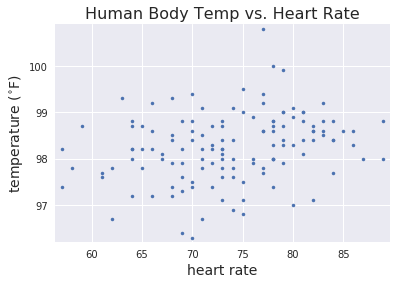

In [224]:
# Make a scatter plot of heart rate vs body temperature
_ = plt.plot(df.heart_rate, df.temperature, marker='.',linestyle='none')


# Set margins and labels
plt.margins(0.02)
_ = plt.title('Human Body Temp vs. Heart Rate', fontsize=16)
_ = plt.xlabel('heart rate', fontsize=14)
_ = plt.ylabel('temperature ($^{\circ}$F)', fontsize=14)

# Show the result
plt.show()


The scatter plot does not show a striking relationship between heart rate and temperature. Still, it is interesting that the temperature outliers have heart rates around 70 and 77 that are more to center and not near the heart rate's outliers.

# Is the distribution of body temperatures normal?


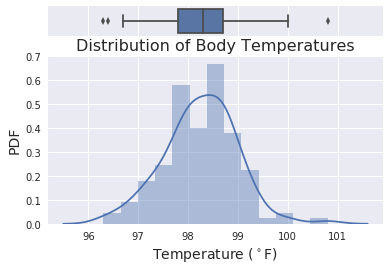

mean temp:  98.25 F,  median temp:  98.3 F


In [225]:
# [two plots] box plot & histogram/distribution plot for temperature
fig, (boxplot, distplot) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

_ = sns.boxplot(df.temperature, ax=boxplot)
_ = sns.distplot(df.temperature, ax=distplot)
_ = plt.title('Distribution of Body Temperatures', fontsize=16)
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
boxplot.set(xlabel='')  #remove boxplot xlabel since title goes in between plots
_ = plt.ylabel('PDF', fontsize=14)
plt.show()

#
print("mean temp: ",round(np.mean(df['temperature']),2), \
      "F,  median temp: ",np.median(df['temperature']),"F")

Even with the potential outliers, the distribution seems normal. Before talk of bin sizes and fitting to theoretical normal distribution, we will look at Cumulative Distribution Function (CDF)

In [226]:
# define ECDF function for 1D arrays
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data & y-data for the ECDF: x and y
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

Sample size:  130 
Sample mean:  98.24923076923078 
Sample std:   0.7303577789050377
First four of Normal Distribution:  [ 98.61200981  98.14824836  98.72227513  99.36158747  98.07821503]


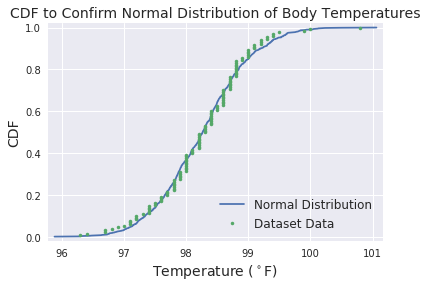

In [227]:
# draw a random sample from a normal distribution
#set random seed
np.random.seed(42)

# create the random sample of the normal distribution, use previous calc temp statistics & size 10,000
norm = np.random.normal(sample_mean, sample_std, 1000)
print("Sample size: ",sample_size,"\nSample mean: ",sample_mean, "\nSample std:  ",sample_std)
print("First four of Normal Distribution: ",norm[0:5])

# Compute ECDF for sample temp and normal norm
x_temp, y_temp = ecdf(df.temperature)
x_norm, y_norm = ecdf(norm)

# Generate plots
_ = plt.plot(x_norm, y_norm)
_ = plt.plot(x_temp, y_temp, marker='.',linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Title, Labels, and Legends
_ = plt.title('CDF to Confirm Normal Distribution of Body Temperatures', fontsize=14)
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
_ = plt.ylabel('CDF',fontsize=14)
_ = plt.legend(('Normal Distribution','Dataset Data'), loc='lower right', fontsize=12)

# Display the plot
plt.show()

The CDF looks good. This further shows that the temperature data apprears to be a normal distribution.

# 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [228]:
print('Sample size: ',sample_size,', Female sample size: ', len(df[df.gender=='F'].temperature), \
      ', Male sample size: ',len(df[df.gender=='M'].temperature))

Sample size:  130 , Female sample size:  65 , Male sample size:  65


The body temperature sample size of 130 is greater than 30, which is considered large in the CLT. Plus, the Female and Male sample sizes are evenly distributed with each having 65. These are both individually considered large in the CLT. It is interesting that both gender sample sizes are exactly the same.

Assuming that these are different people, the observations are independent. Each persons body temperature observations are distinct, and are not normally influenced by nor will reveal information about other observations.  


# 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  $t$ or $z$ statistic?
* Now try using the other test. How is the result be different? Why?

A one sample test would be the best to use, since one set of data is being compared to a single value. Because the populations standard deviation is unknown, we should use the $t$ statistic. With this large sample size, the $t$ statistic should trend toward the $z$ statistic.

**Null Hypothesis** is that population mean is actually 98.6$^{\circ}$F.

H$_0$ : ${\mu}$ = 98.6$^{\circ}$F

**Significance Level:** 99.9% confidence

${\alpha}$ = 0.001

## First: one-sample t-statistic & p-value

In [229]:
#set conventional temperature
conv_temp = 98.6
conf_level= 0.001/2

##t_stat = (sample_mean - conv_temp)/(sample_std/np.sqrt(sample_size))
#get and print t-statistic and p-value for one sample
t_stat, p_val = stats.ttest_1samp(df.temperature, conv_temp)

print("t-statistic: ", t_stat, "\np-value: ", p_val)


t-statistic:  -5.45482329236 
p-value:  2.41063204156e-07


In [230]:
# find range of t-statistic for given confidence level and degrees of freedom
print("t-statistic range:", stats.t.ppf(q=conf_level, df=sample_size-1), "to",
      stats.t.ppf((1-conf_level), df=sample_size-1))

t-statistic range: -3.36754645418 to 3.36754645418


Even though we chose a high confidence level, 99.9%, the $t$-statistic falls outside of the range. Plus, the p-value is over a thousand times below the significance level of 0.01. So, the null hypothesis can be rejected.

## Second: one-sample  z-statistic & p-value
Let's look at the z-statistic. While the z-statistic is not rrecommended when the population standard deviation is not known, we can approximating the population standard deviation as the sample standard deviation / square root of the sample size.


In [231]:
# calc z-statistic & p-value
z_stat = (sample_mean - conv_temp) / (sample_std / np.sqrt(sample_size))
p_val2 = stats.norm.cdf(z_stat) * 2

print("z-statistic: ", z_stat, "\np-value: ", p_val2)

z-statistic:  -5.47592520208 
p-value:  4.35231516588e-08


As expected with a large sample size, the z-statistic is pretty close to the t-statistic. In addition the p-value is very low again.

# 4. Draw a small sample of size 10 from the data and repeat both tests. 
* Which one is the correct one to use? 
* What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

The population standard deviation is still unknown and the sample size of 10 is well below 30, it looks like 2 out of 2 criteria for t-statistics.

## t-statistic followed by z-statistic
Also, need to generate a small random sample (10 items) from the sample set.

In [232]:
#create random small samle set
small_sample_size = 10
small_sample = np.random.choice(df.temperature, size=small_sample_size)
print("small sample:",small_sample)

#get and print t-statistic and p-value for one sample
t_stat, p_val = stats.ttest_1samp(small_sample, conv_temp)

print("t-statistic: ", t_stat, "\np-value: ", p_val)


small sample: [ 98.7  97.9  99.4  99.1  99.   98.4  99.2  98.   98.   98.4]
t-statistic:  0.0576390417705 
p-value:  0.955295581645


In [233]:
# confidence level 95%
conf_level= 0.05/2

# find range of t-statistic for given confidence level and degrees of freedom
print((1-conf_level*2)*100,"% confidence, t-statistic range:", stats.t.ppf(q=conf_level, df=small_sample_size-1), "to",
      stats.t.ppf(q=(1-conf_level), df=small_sample_size-1),"\n" )

# confidence level 99.9%
conf_level= 0.001/2

# find range of t-statistic for given confidence level and degrees of freedom
print((1-conf_level*2)*100,"% confidence, t-statistic range:", stats.t.ppf(q=conf_level, df=small_sample_size-1), "to",
      stats.t.ppf((1-conf_level), df=small_sample_size-1))

95.0 % confidence, t-statistic range: -2.26215716274 to 2.26215716274 

99.9 % confidence, t-statistic range: -4.78091258593 to 4.78091258593


In [234]:
# calc z-statistic (with estimated population std) & p-value
z_stat = (np.mean(small_sample) - conv_temp) / (np.std(small_sample) / np.sqrt(small_sample_size))
p_val2 = stats.norm.cdf(z_stat) * 2

print("z-statistic: ", z_stat, "\np-value: ", p_val2)

z-statistic:  0.0607568847147 
p-value:  1.04844717214


The sample of 10's t-statistics falls outside the range with a 95% confidence level. While t-statistic is within the range at 99.9%, it is hard to have a 99.9% confidence with such a small sample size. The t and z statistic values are  different, but their p-values are very different. It show how the z-statistic diverges from the t-statistic with sample sizes under 30.


# 5. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.
 
 

In [235]:
# get z critical value at 95% (2.5% to 97.5%)
z_crit =stats.norm.ppf(0.975)
print("The z critical at 95%:",z_crit)

# calc margin of error
margin_err = z_crit * (sample_std / np.sqrt(sample_size))
print("The margin of error on the sample mean temperature:", margin_err,"\n")

# 95% confidence interval
conf_low, conf_high = np.percentile(df.temperature, [2.5, 97.5])
print('The 95% Confidence Interval Mean:', conf_low, 'to', conf_high, "F")

# 99% confidence interval
conf_low, conf_high = np.percentile(df.temperature, [0.5, 99.5])
print('The 99% Confidence Interval Mean:', conf_low, 'to', conf_high, "F\n")

# 95% prediction Interval
predict_interval = z_crit * sample_std
print('The 95% Prediction Interval:',sample_mean - predict_interval, 'to', sample_mean + predict_interval)

#check 95% prediction Interval 2
check_low, check_high = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std)
print('Normal temperatures between', check_low, 'and', check_high)

The z critical at 95%: 1.95996398454
The margin of error on the sample mean temperature: 0.125548657774 

The 95% Confidence Interval Mean: 96.7225 to 99.4775 F
The 99% Confidence Interval Mean: 96.3645 to 100.284 F

The 95% Prediction Interval: 96.8177558267 to 99.6807057117
Normal temperatures between 96.8177558267 and 99.6807057117


The "Abnormal" Body Temperatures would be lower than 96.8$^{\circ}$F and larger than 99.7$^{\circ}$F.

# 6. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

We will first explore the Female and Male data with scatter and distribution plots.

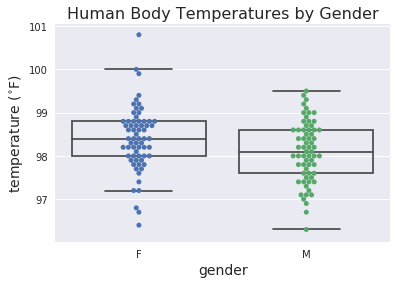

Female median temp:  98.4 F, Male median temp:  98.1 F
Female mean temp:  98.39384615384613 F, Male mean temp:  98.1046153846154 F


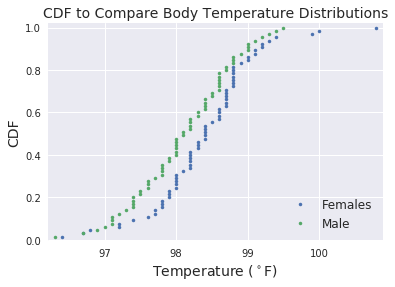

In [236]:
# Make a Swarm plot of gender vs body temperature
_ = sns.swarmplot(x='gender',y='temperature', data=df)
_ = sns.boxplot(x='gender',y="temperature", data=df,
        showcaps=True, boxprops={'facecolor':'None'},
        showfliers=False, whiskerprops={'linewidth':0})
_ = plt.xlabel('gender', fontsize=14)
_ = plt.ylabel('temperature ($^{\circ}$F)', fontsize=14)
_ = plt.title('Human Body Temperatures by Gender', fontsize=16)
plt.show()

# Separate dataset temp by gender
females = df[df['gender'] == 'F'].temperature
males = df[df['gender'] == 'M'].temperature
mean_females = np.mean(females)
mean_males = np.mean(males)

print("Female median temp: ",np.median(females), \
      "F, Male median temp: ",np.median(males),"F")
print("Female mean temp: ",mean_females, \
      "F, Male mean temp: ",mean_males,"F")

# EDA of Female and Male CDF


# Compute ECDF for Females and Males 
x_female, y_female = ecdf(females)
x_male,   y_male   = ecdf(males)

# Generate plots
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Title, Labels, and Legends
_ = plt.title('CDF to Compare Body Temperature Distributions', fontsize=14)
_ = plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
_ = plt.ylabel('CDF',fontsize=14)
_ = plt.legend(('Females','Male'), loc='lower right', fontsize=12)

plt.show()

The Female's temperature have higher values then the Male's. The combined  possible higher outliers were Female temperatures, with 100.8$^{\circ}$F definitely an outlier. Both Female and Male each have a possible lower outlier around 96.3$^{\circ}$F.


In [237]:
print("Female median temp (below",round(check_high,3),"F): ",np.median(females[females<check_high]), \
      "F, Male median temp: ",np.median(males),"F")
print("Female mean temp (below",round(check_high,3),"F): ",np.mean(females[females<check_high]), \
      "F, Male mean temp: ",np.mean(males),"F")
females[females<check_high].describe()

Female median temp (below 99.681 F):  98.4 F, Male median temp:  98.1 F
Female mean temp (below 99.681 F):  98.3048387096774 F, Male mean temp:  98.1046153846154 F


count    62.000000
mean     98.304839
std       0.630490
min      96.400000
25%      98.000000
50%      98.400000
75%      98.775000
max      99.400000
Name: temperature, dtype: float64

So, after removing 3 high end temperature outliers (temperatures above 99.6$^{\circ}$F) the Female mean is still 0.3$^{\circ}$F warmer then Males in this dataset. Note that the Male temperature were all under this 99.6$^{\circ}$F cap. Plus, if we cut the lower 4 outliers, the two pairs of temperatures are one Female and one Male, so equal effect on both. There is a statistical difference between Female and Male means. Additional statistical analysis will help to determine if the difference is significant.

**Null Hypothesis:** There is no significant difference between Female and Male normal body temperature.

H$_0$ = ${\mu}_{Female}$ - ${\mu}_{Male}$ = 0



In [238]:
def bootstrap_replicate_1d(data, func):
    """one dimention boot strap replicate"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [239]:
# Generate shifted arrays
female_shifted = females - mean_females + sample_mean
male_shifted   = males - mean_males + sample_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, 10000)
bs_replicates_male   = draw_bs_reps(male_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p
p = np.sum(bs_replicates > (mean_females - mean_males)) / 10000
print('p-value =', p)

p-value = 0.0095


This small p value shows that the difference in the means of female and male temperatures is statistically significant. The null hypothesis, H$_0$ can be rejected.



# Conclusion
The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book.  Through statistical analysis of a large dataset, the mean normal body temperature was computed with 95% confidence to be between 96.72$^{\circ}$F and 99.48$^{\circ}$F. In addition, there was also found a statistically significant difference in the means between females and males temperatures. 